<a href="https://colab.research.google.com/github/indranildchandra/ML101-Codelabs/blob/master/src/Class_Imbalance_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  

 # Upload creditcard.csv file

Saving creditcard.csv to creditcard.csv
User uploaded file "creditcard.csv" with length 102634230 bytes


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [0]:
%matplotlib inline

rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [0]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [0]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [0]:
df = pd.read_csv('creditcard.csv')

In [12]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
target = 'Class'

In [0]:
X = df.loc[:, df.columns!=target]
Y = df.loc[:, df.columns==target]

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

0    284315
1       492
Name: Class, dtype: int64


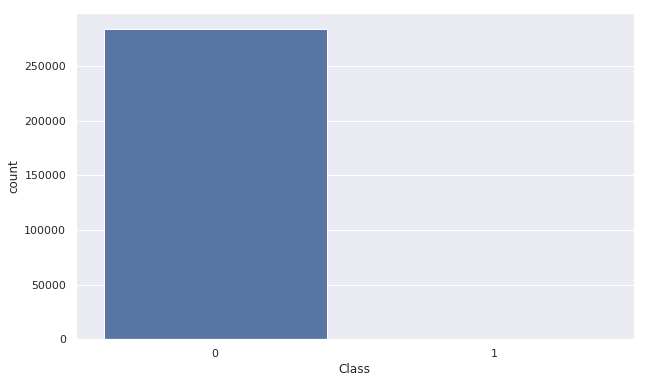

In [16]:
ax = sns.countplot(x=target, data=df)
print(df[target].value_counts())

In [17]:
100* (492/float(df.shape[0]))

0.1727485630620034

In [18]:
100* (284315/float(df.shape[0]))

99.82725143693798

In [19]:
Y_train[target].value_counts()

0    190477
1       343
Name: Class, dtype: int64

In [0]:
clf = LogisticRegression().fit(X_train, Y_train)

In [0]:
Y_Test_Pred = clf.predict(X_test)

In [22]:
pd.crosstab(pd.Series(Y_Test_Pred, name = 'Predicted'), 
            pd.Series(Y_test[target], name = 'Actual'))

Actual,0,1
Predicted,,
0,30752,63
1,34,0


In [23]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9987657867577431
Precision =  0.6513761467889908
Recall =  0.47651006711409394
F1 Score =  0.5503875968992248


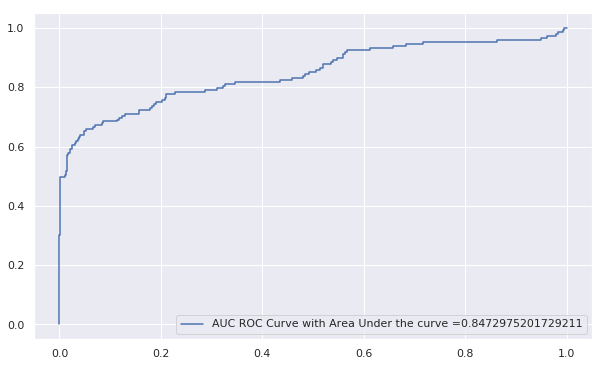

In [24]:
generate_auc_roc_curve(clf, X_test)

**class_weight:** *dict, ‘balanced’ or None*

If ‘balanced’, class weights will be given by n_samples / (n_classes * np.bincount(y)) 

=> total number of samples / (total number of classes * number of samples with output as the class under observation). 

If a dictionary is given, keys are classes and values are corresponding class weights. 

If None is given, the class weights will be uniform.

In [25]:
unique_classes = list(df[target].unique())
unique_classes

[0, 1]

In [26]:
out_dict = {}
for classes in unique_classes:
    out_dict[classes] = df.shape[0]/((df.loc[df[target] == classes].shape[0])*len(unique_classes))
print(out_dict)

{0: 0.5008652375006595, 1: 289.4380081300813}


In [27]:
print (X_train.shape, Y_train.shape)

(190820, 30) (190820, 1)


In [0]:
clf = LogisticRegression(class_weight='balanced').fit(X_train, Y_train)

In [0]:
from sklearn.utils import class_weight

In [30]:
class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train[target])

array([  0.50090037, 278.16326531])

In [0]:
Y_Test_Pred = clf.predict(X_test)

In [32]:
pd.crosstab(pd.Series(Y_Test_Pred, name = 'Predicted'), 
            pd.Series(Y_test[target], name = 'Actual'))

Actual,0,1
Predicted,,
0,29958,62
1,828,1


In [33]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9754753316948088
Precision =  0.05601317957166392
Recall =  0.912751677852349
F1 Score =  0.10554908808692277


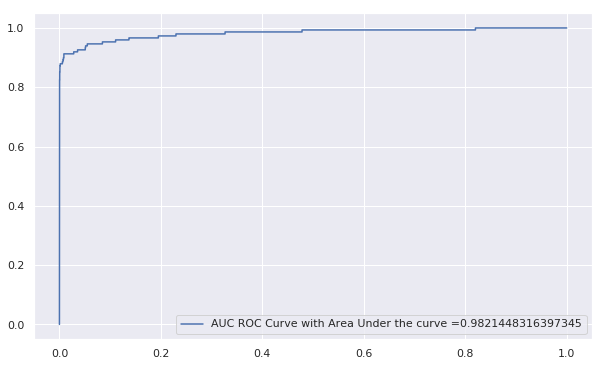

In [34]:
generate_auc_roc_curve(clf, X_test)

In [35]:
from sklearn.model_selection import GridSearchCV
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)

grid_result = gsc.fit(X_train, Y_train)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.23947368421052628, 1: 0.7605263157894737}}


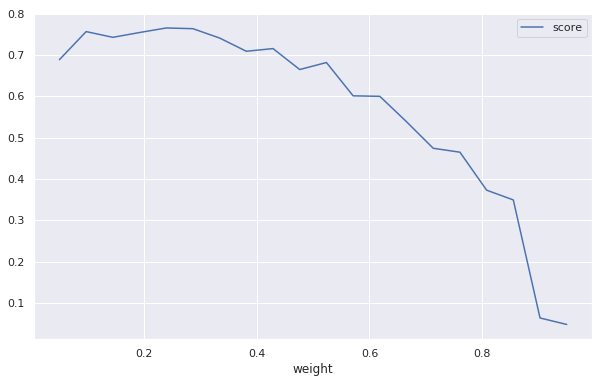

In [36]:
data_out = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
data_out.plot(x='weight')

In [37]:
print(data_out)

       score    weight
0   0.688620  0.050000
1   0.756566  0.097368
2   0.742706  0.144737
3   0.754339  0.192105
4   0.765364  0.239474
5   0.763623  0.286842
6   0.740974  0.334211
7   0.708962  0.381579
8   0.715458  0.428947
9   0.664738  0.476316
10  0.681704  0.523684
11  0.601097  0.571053
12  0.599889  0.618421
13  0.538431  0.665789
14  0.474159  0.713158
15  0.464639  0.760526
16  0.372763  0.807895
17  0.349089  0.855263
18  0.063391  0.902632
19  0.047618  0.950000


In [0]:
clf = LogisticRegression(**grid_result.best_params_).fit(X_train, Y_train)

In [0]:
Y_Test_Pred = clf.predict(X_test)

In [40]:
pd.crosstab(pd.Series(Y_Test_Pred, name = 'Predicted'), 
            pd.Series(Y_test[target], name = 'Actual'))

Actual,0,1
Predicted,,
0,30732,63
1,54,0


In [41]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9993084149935629
Precision =  0.8043478260869565
Recall =  0.7449664429530202
F1 Score =  0.7735191637630662


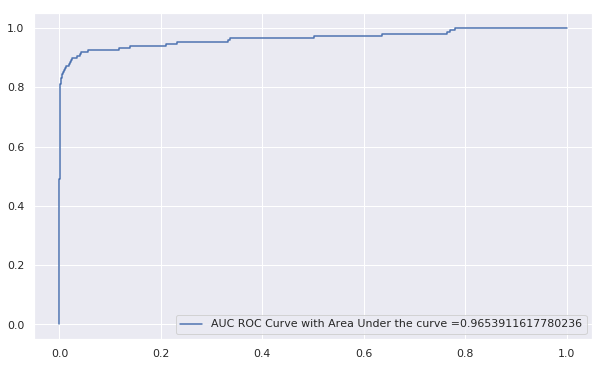

In [42]:
generate_auc_roc_curve(clf, X_test)

# Undersampling

In [43]:
minority_class_len = len(df[df[target] == 1])
print(minority_class_len)

492


In [44]:
majority_class_indices = df[df[target] == 0].index
print(majority_class_indices)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)


In [45]:
random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=False)
print(len(random_majority_indices))

492


In [46]:
minority_class_indices = df[df[target] == 1].index
print(minority_class_indices)

Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=492)


In [0]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])

In [0]:
under_sample = df.loc[under_sample_indices]

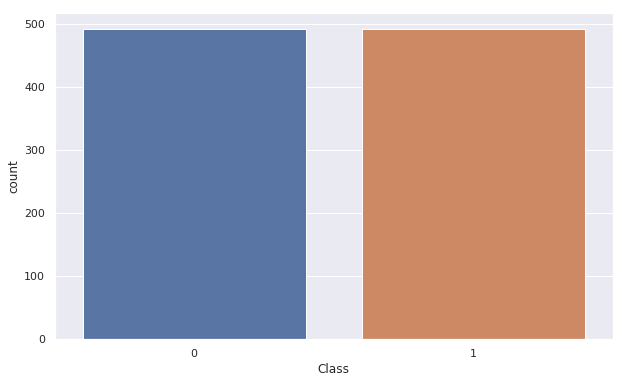

In [49]:
sns.countplot(x=target, data=under_sample)

In [0]:
X = under_sample.loc[:, df.columns!=target]
Y = under_sample.loc[:, df.columns==target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = LogisticRegression().fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)

In [51]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9292307692307692
Precision =  0.9795918367346939
Recall =  0.8780487804878049
F1 Score =  0.9260450160771704


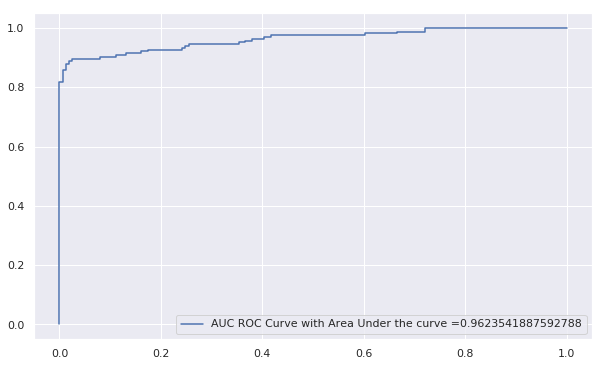

In [52]:
generate_auc_roc_curve(clf, X_test)